In [22]:
from softmax_neural_network import *
import matplotlib.pyplot as plt
import tensorflow as tf

This notebook tests different modifications to a softmax output neural network 

In [23]:
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = tf.keras.datasets.mnist.load_data()

4


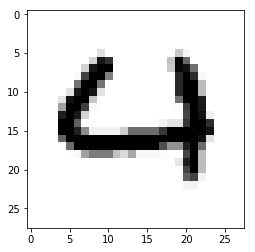

In [24]:
%matplotlib inline
image_index = 60# You may select anything up to 60,000
print(y_train_orig[image_index]) 
plt.imshow(x_train_orig[image_index], cmap='Greys')

In [40]:
#Basic setup
def one_hotorize(x, num_labels):
    #x must be of shape (1,m)
    m = x.shape[1]
    columns = np.arange(m)
    one_indexes = x
    one_hot = np.zeros((num_labels, m))
    one_hot[one_indexes, columns] = 1
    return one_hot
    
num_labels = 10
print("Number of labels = " + str(num_labels))

#Reshaping the y arrays, to be an example each column and one hot vetors
y_train_one = y_train_orig.reshape(y_train_orig.shape[0],1).T
y_test_one = y_test_orig.reshape(y_test_orig.shape[0],1).T

y_train = one_hotorize(y_train_one, num_labels)
y_test = one_hotorize(y_test_one, num_labels)

print("y_train shape = " + str(y_train.shape))
print("y_test shape = " + str(y_test.shape))

print("one_hot = " + str(y_train[:,0]) + " original label = " + str(y_train_orig[0]))
print("one_hot = " + str(y_train[:,555]) + " original label = " + str(y_train_orig[555]))

#Reshaping the x tensors to a matrix of the examples as each column
x_train = x_train_orig.reshape(x_train_orig.shape[0],x_train_orig.shape[1] * x_train_orig.shape[2]) .T
x_test = x_test_orig.reshape(x_test_orig.shape[0],x_test_orig.shape[1] * x_test_orig.shape[2]) .T
print("x_train shape = " + str(x_train.shape))
print("x_test shape = " + str(x_test.shape))



Number of labels = 10
y_train shape = (10, 60000)
y_test shape = (10, 10000)
one_hot = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] original label = 5
one_hot = [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] original label = 2
x_train shape = (784, 60000)
x_test shape = (784, 10000)


### One layer network

In [30]:
#Logistic Regression
n_x = x_train.shape[0]
layers = [n_x, num_labels]
num_hidden_layers = len(layers) - 1

In [32]:
parameters, costs = model_SNN(x_train, y_train, layers, learning_rate = 0.5, num_iterations = 1000, print_cost = True, print_every = 100, initialization = "rand", loaded_parameters = {})

/Users/zeba/Desktop/DeepLearning/NeuralNetworksPython/activation_functions.py:16: RuntimeWarning: overflow encountered in exp
  x_exp = np.exp(x)
/Users/zeba/Desktop/DeepLearning/NeuralNetworksPython/activation_functions.py:17: RuntimeWarning: invalid value encountered in true_divide
  return x_exp / np.sum(x_exp, axis = 0)


ValueError: operands could not be broadcast together with shapes (60000,1) (10,784) 